In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv('/content/heart-disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [8]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [9]:
df['target'].value_counts()

,count
target,
1,165
0,138


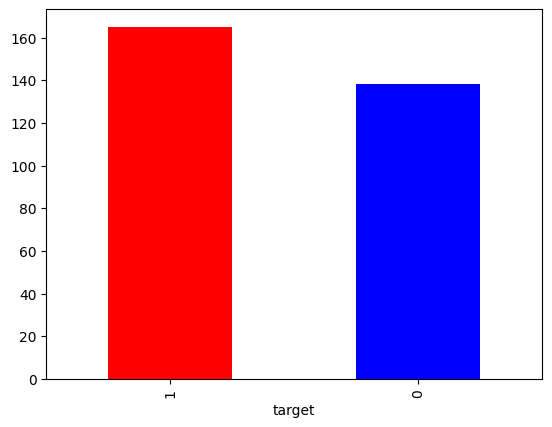

In [11]:
df["target"].value_counts().plot(kind="bar", color=["red", "blue"]);

In [10]:
df['sex'].value_counts()

,count
sex,
1,207
0,96


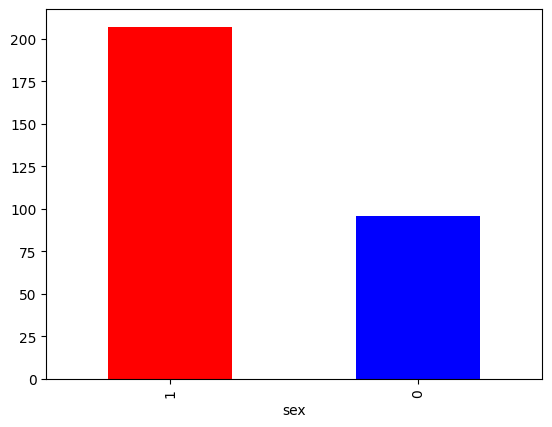

In [12]:
df["sex"].value_counts().plot(kind="bar", color=["red", "blue"]);

(14.5, -0.5)

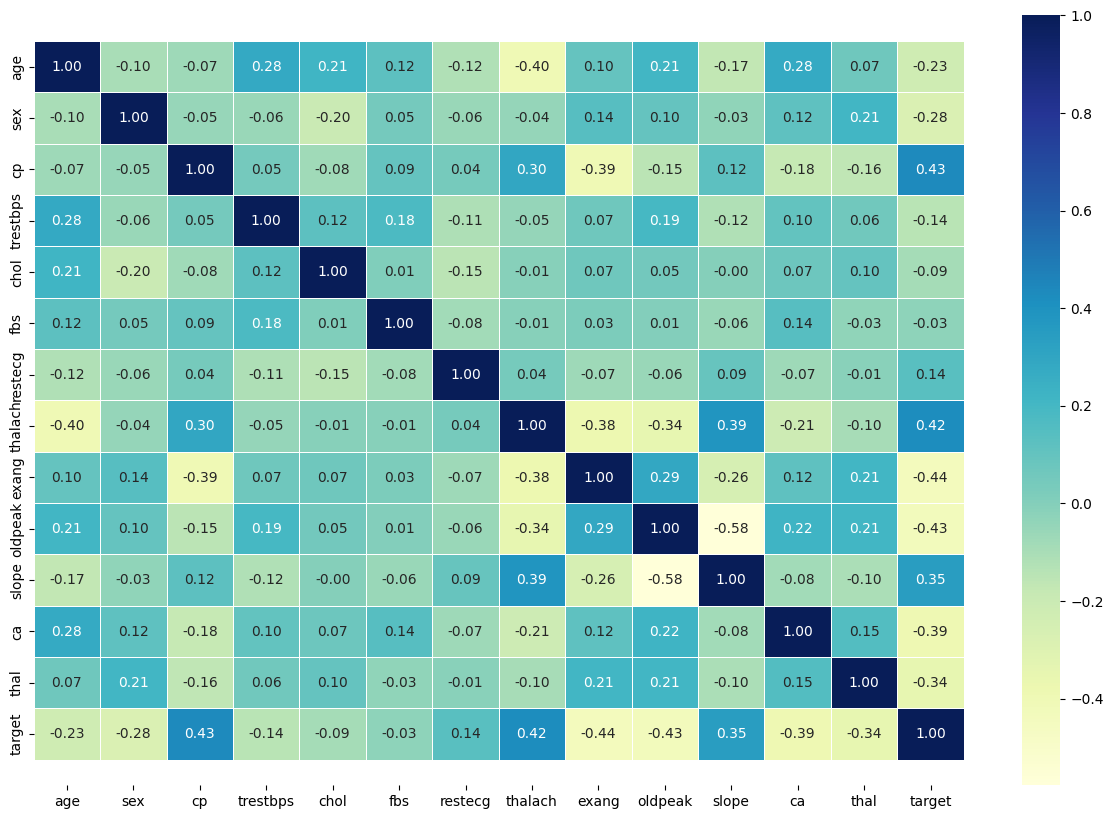

In [13]:
# let's make now correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax =plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot =True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)

In [14]:
X = df.drop(columns=['target'], axis=1)
y = df['target']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [17]:
len(X_train), len(X_test), len(y_train), len(y_test)

(242, 61, 242, 61)

In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score:",accuracy_score(y_test,y_pred))

Accuracy Score: 0.8852459016393442


In [21]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score:",accuracy_score(y_test,y_pred))

Accuracy Score: 0.7049180327868853


In [23]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred))

Accuracy Score: 0.6557377049180327


In [25]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [26]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict
y_pred = knn_cv.predict(X_test)

# Evaluate
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Test Accuracy: 0.7704918032786885
[[23  6]
 [ 8 24]]
              precision    recall  f1-score   support

           0       0.74      0.79      0.77        29
           1       0.80      0.75      0.77        32

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

pipeline = Pipeline([
    ('scaler', StandardScaler()),     # Standardize data
    ('svc', SVC())                    # SVM model
])

param_grid = {
    'svc__C': [0.1, 1, 10, 100],        # Regularization parameter
    'svc__gamma': ['scale', 0.01, 0.1, 1],  # Kernel coefficient
    'svc__kernel': ['rbf', 'linear']    # Kernel types
}

grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fit on training data
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', SVC())]),
             param_grid={'svc__C': [0.1, 1, 10, 100],
                         'svc__gamma': ['scale', 0.01, 0.1, 1],
                         'svc__kernel': ['rbf', 'linear']},
             scoring='accuracy')

In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict
y_pred = grid.predict(X_test)

# Evaluate
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Test Accuracy: 0.8524590163934426
[[25  4]
 [ 5 27]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [ ]:
!pip install joblib

import joblib
#Setting Grid For KNN
knn_grid = {'n_neighbors': range(1,10, 1),
            'leaf_size': range(20,40,1),
            'p': (1,2),
            'weights': ('uniform', 'distance'),
            'metric': ('minkowski', 'chebyshev')}

# Instantiating GridSearch CV
gs_knn = GridSearchCV(KNeighborsClassifier(),
                      param_grid=knn_grid,
                      cv=5,
                      verbose=3)

# Fitting Data in GridSearch CV Model
gs_knn.fit(X_train, y_train)

# Extract the best model from the GridSearchCV object
best_model = gs_knn.best_estimator_

# Save the best model using joblib
joblib.dump(best_model, 'model.joblib')

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits
[CV 1/5] END leaf_size=20, metric=minkowski, n_neighbors=1, p=1, weights=uniform;, score=0.571 total time=   0.0s
[CV 2/5] END leaf_size=20, metric=minkowski, n_neighbors=1, p=1, weights=uniform;, score=0.633 total time=   0.0s
[CV 3/5] END leaf_size=20, metric=minkowski, n_neighbors=1, p=1, weights=uniform;, score=0.583 total time=   0.0s
[CV 4/5] END leaf_size=20, metric=minkowski, n_neighbors=1, p=1, weights=uniform;, score=0.646 total time=   0.0s
[CV 5/5] END leaf_size=20, metric=minkowski, n_neighbors=1, p=1, weights=uniform;, score=0.604 total time=   0.0s
[CV 1/5] END leaf_size=20, metric=minkowski, n_neighbors=1, p=1, weights=distance;, score=0.571 total time=   0.0s
[CV 2/5] END leaf_size=20, metric=minkowski, n_neighbors=1, p=1, weights=distance;, score=0.633 total time=   0.0s
[CV 3/5] END leaf_size=20, metric=minkowski, n_neighbors=1, p=1, weights=distance;, score=0.583 total time=   0.0s
[CV 4/5] END leaf_si

In [32]:
# Install joblib (optional if already installed)
!pip install joblib

import joblib
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define the pipeline with StandardScaler and SVC
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])

# Define hyperparameter grid
svm_grid = {
    'svc__C': [0.1, 1, 10],
    'svc__gamma': ['scale', 0.01, 0.1],
    'svc__kernel': ['rbf', 'linear'],
    'svc__decision_function_shape': ['ovr', 'ovo']
}

# Initialize GridSearchCV
gs_svm = GridSearchCV(svm_pipeline,
                      param_grid=svm_grid,
                      cv=5,
                      verbose=3)

# Fit on training data
gs_svm.fit(X_train, y_train)

# Get the best model
best_svm_model = gs_svm.best_estimator_

# Save best model
joblib.dump(best_svm_model, 'best_svm_model.joblib')

print("✅ Best SVM model saved as 'best_svm_model.joblib'")


Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END svc__C=0.1, svc__decision_function_shape=ovr, svc__gamma=scale, svc__kernel=rbf;, score=0.796 total time=   0.0s
[CV 2/5] END svc__C=0.1, svc__decision_function_shape=ovr, svc__gamma=scale, svc__kernel=rbf;, score=0.796 total time=   0.0s
[CV 3/5] END svc__C=0.1, svc__decision_function_shape=ovr, svc__gamma=scale, svc__kernel=rbf;, score=0.792 total time=   0.0s
[CV 4/5] END svc__C=0.1, svc__decision_function_shape=ovr, svc__gamma=scale, svc__kernel=rbf;, score=0.792 total time=   0.0s
[CV 5/5] END svc__C=0.1, svc__decision_function_shape=ovr, svc__gamma=scale, svc__kernel=rbf;, score=0.812 total time=   0.0s
[CV 1/5] END svc__C=0.1, svc__decision_function_shape=ovr, svc__gamma=scale, svc__kernel=linear;, score=0.776 total time=   0.0s
[CV 2/5] END svc__C=0.1, svc__decision_function_shape=ovr, svc__gamma=scale, svc__kernel=linear;, score=0.857 total time=   0.0s
[CV 3/5] END svc__C=0.1, svc__decision_function_sh

In [35]:
from sklearn.model_selection import cross_val_score
model_cross_val_score({"Grid_Search-KNN" : KNeighborsClassifier(leaf_size=20,
                                                                metric='chebyshev',
                                                                n_neighbors=7,
                                                                p=1,
                                                                weights='distance'),
                       "KNN - Base Model" : KNeighborsClassifier()},
                      X, y, cv=5)

{'Grid_Search-KNN': np.float64(0.6240437158469946),
 'KNN - Base Model': np.float64(0.643879781420765)}